In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [3]:
# Download the punkt tokenizer models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
"""
Possible TODO:
- sentiment
- Part of Speech: nouns, verbs, adjectives
- Named entities
- lexical desnity: ratio of content word (nouns, adjectives, adverbs)
"""

'\nPossible TODO:\n- sentiment\n- Part of Speech: nouns, verbs, adjectives\n- Named entities\n- lexical desnity: ratio of content word (nouns, adjectives, adverbs)\n'

## Read Data

In [5]:
# Load the data from csv
df = pd.read_csv('data/hack.csv')

print(df.shape)

(8000, 6)


In [6]:
df = df.dropna(subset=['humor_rating'])

# find median of humor_rating
median_rating = df['humor_rating'].median()
print('median and therefore middle of humor_rating:', median_rating)

df['is_humor'] = df['humor_rating'] > median_rating 

is_humor = df['is_humor'].value_counts()
print(is_humor)

median and therefore middle of humor_rating: 2.28
False    2474
True     2458
Name: is_humor, dtype: int64


In [7]:
# count how many is_humor is True
is_humor = df['is_humor'].value_counts()
print(is_humor)

False    2474
True     2458
Name: is_humor, dtype: int64


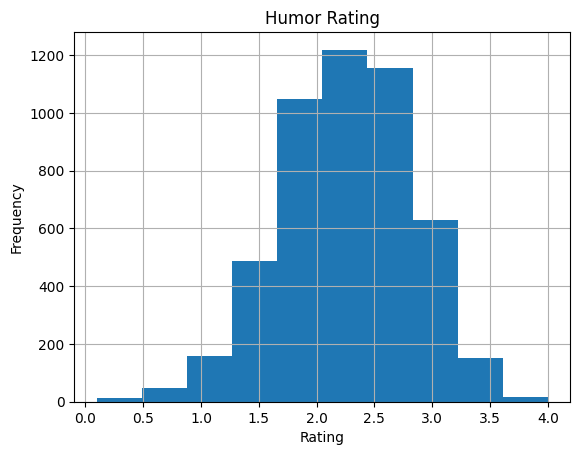

In [8]:
# hist humor_rating
df['humor_rating'].hist()
plt.title('Humor Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

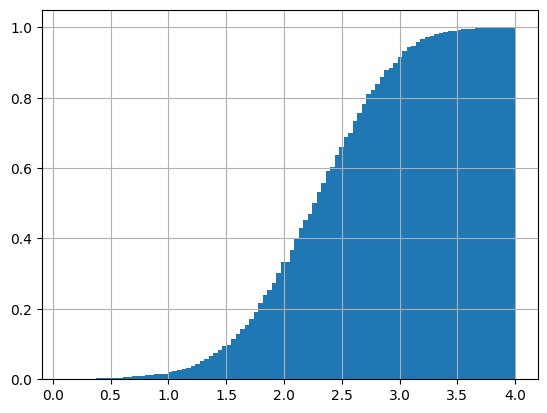

In [9]:
# plot with cumulative distribution
df['humor_rating'].hist(cumulative=True, density=1, bins=100)

In [10]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == True].iloc[i]['text'])
    print()

TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit...

A man inserted an advertisement in the classifieds "Wife Wanted". The next day, he received 1000 of replies, all reading: "You can have mine." Free delivery also available at your door step

Roses are dead. Love is fake. Weddings are basically funerals with cake.

I'm not saying my pubes are getting too long, but when I get an erection, it looks like Pinocchio has gone and joined the Taliban.

My girlfriend is like the square root of -100. She's a 10, but she's imaginary.



In [11]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == False].iloc[i]['text'])
    print()

How many men does it take to open a can of beer? None. It should be open by the time she brings it to the couch.

Told my mom I hit 1200 Twitter followers. She pointed out how my brother owns a house and I'm wanted by several collection agencies. Oh ma!

ME: I'm such an original. Truly one of a kind. ALSO ME: [holding a glass of white wine] I love to laugh.

What's the difference between a Mormon man and a Muslim man. A Mormon man gets 72 virgins and THEN kills himself.

Stop calling 9-1-1 because you've run out of toilet paper. Yes. If you're running out of toilet paper don't dial 9-1-1. The number for that is 9-2-2.' -Stephen Colbert



## Tokenize

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return tokens

In [14]:
# tokenization
df['tokenized_text'] = df['text'].apply(word_tokenize)

In [15]:
# standardize tokenized text
df['standardized_text'] = df['text'].apply(preprocess_text)

## Added General Characteristics

In [16]:
# count length of each joke
df['text_length'] = df['text'].apply(len)

In [17]:
# word count of each joke
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [18]:
# avg word length of each joke
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [19]:
# count of punctuation
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in ['.', ',', '!', '?']]))

In [20]:
# stop words / total words
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

def calculate_stopword_ratio(tokens):
    non_stopwords = remove_stopwords(tokens)
    if len(tokens) == 0:
        return 0
    return 1 - (len(non_stopwords) / len(tokens))

df['stopword_ratio'] = df['tokenized_text'].apply(calculate_stopword_ratio)

In [21]:
def calculate_richness(tokens):
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

df['richness'] = df['standardized_text'].apply(calculate_richness)

In [22]:
def get_readability(text):
    score = textstat.automated_readability_index(text)
    return score

"""other scores:
- flesch_reading_ease
- flesch_kincaid_grade
- smog_index
- coleman_liau_index
- automated_readability_index
- dale_chall_readability_score
- linsear_write_formula
- gunning_fog
- text_standard
"""


'other scores:\n- flesch_reading_ease\n- flesch_kincaid_grade\n- smog_index\n- coleman_liau_index\n- automated_readability_index\n- dale_chall_readability_score\n- linsear_write_formula\n- gunning_fog\n- text_standard\n'

In [23]:
df['readability'] = df['text'].apply(get_readability)

In [24]:
def get_difficult_words(text):
    score = textstat.difficult_words(text) / len(text.split())
    return score

In [25]:
df['difficult_words'] = df['text'].apply(get_difficult_words)

## Plots of Characteristics

In [26]:
def hist_compare(df, column, title):
    print(df.groupby('is_humor')[column].agg(['mean', 'min', 'max', 'std']))
    plt.hist(df[df['is_humor'] == True][column], bins=20, alpha=0.5, label='is_humor=True')
    plt.hist(df[df['is_humor'] == False][column], bins=20, alpha=0.5, label='is_humor=False')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    return plt

                mean  min  max        std
is_humor                                 
False     104.892482   10  280  45.548521
True      109.274614   29  279  43.757972


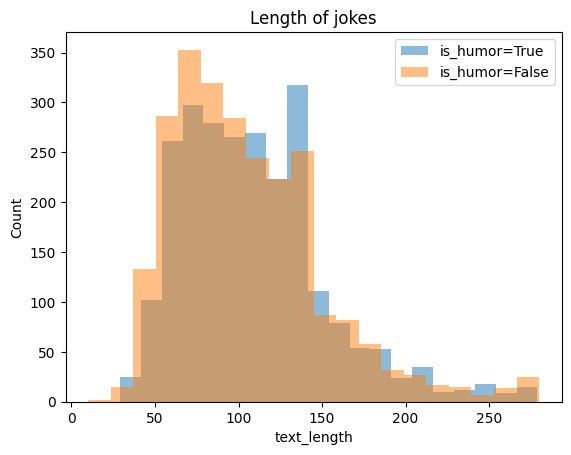

In [27]:
# 2 hist of length of jokes
hist_compare(df, 'text_length', 'Length of jokes').show()

In [43]:
# length of jokes length to contain 95% of the data
print('0.8 of the jokes have a length of:', df['text_length'].quantile(0.8))
print('0.95 of the jokes have a length of:', df['text_length'].quantile(0.95))

# max length of jokes
print(df['text_length'].max())

0.8 of the jokes have a length of: 139.0
0.95 of the jokes have a length of: 192.0
280


               mean  min  max       std
is_humor                               
False     19.668553    2   57  8.688299
True      20.815704    5   57  8.454083


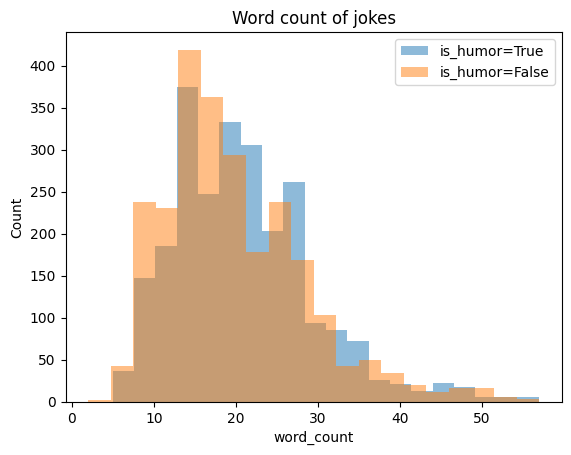

In [29]:
# 2 hist of word count of jokes
hist_compare(df, 'word_count', 'Word count of jokes').show()

              mean       min        max       std
is_humor                                         
False     4.450072  2.700000  11.200000  0.620048
True      4.351607  2.916667   7.333333  0.557050


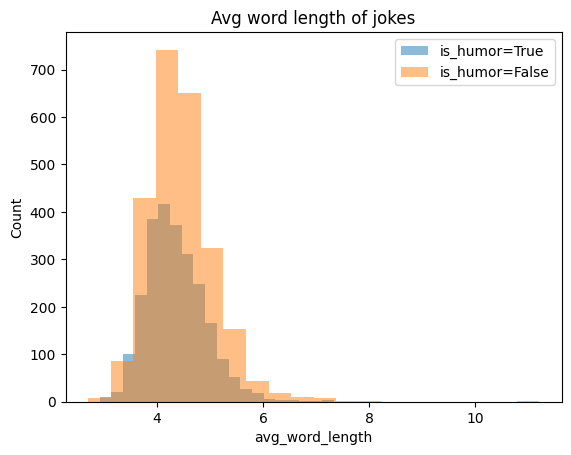

In [30]:
# 2 hist of avg word length of jokes
hist_compare(df, 'avg_word_length', 'Avg word length of jokes').show()

              mean  min  max       std
is_humor                              
False     2.485853    0   16  2.024916
True      2.675753    0   18  2.045730


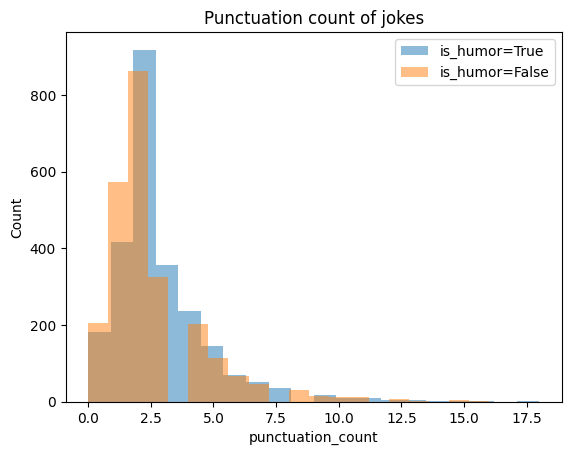

In [31]:
# 2 hist of punctuation count of jokes
hist_compare(df, 'punctuation_count', 'Punctuation count of jokes').show()

              mean       min  max       std
is_humor                                   
False     0.918427  0.400000  1.0  0.100740
True      0.906870  0.380952  1.0  0.102482


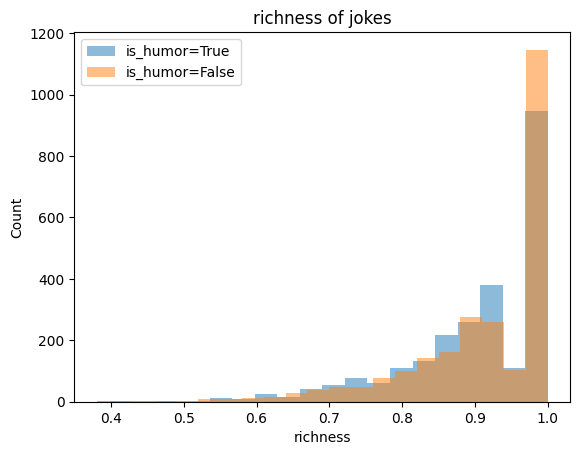

In [32]:
# 2 hist of richness of jokes
hist_compare(df, 'richness', 'richness of jokes').show()

              mean  min       max       std
is_humor                                   
False     0.401827  0.0  0.647059  0.093978
True      0.417573  0.0  0.666667  0.088504


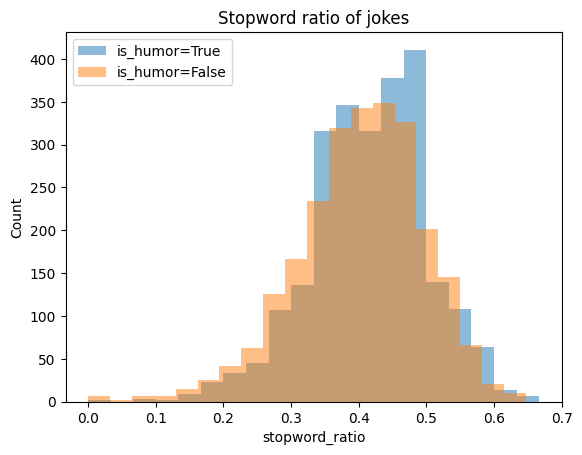

In [33]:
# 2 hist of stopword_ratio of jokes
hist_compare(df, 'stopword_ratio', 'Stopword ratio of jokes').show()

              mean  min   max       std
is_humor                               
False     5.782781 -3.8  33.8  3.940692
True      5.368348 -4.2  22.3  3.758765


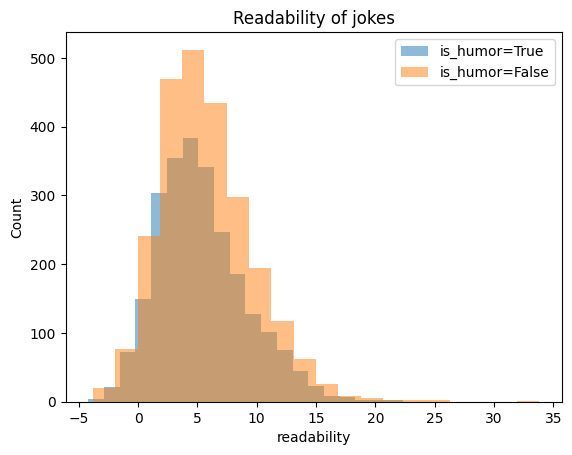

In [34]:
# 2 hist of readability of jokes
hist_compare(df, 'readability', 'Readability of jokes').show()

              mean  min       max       std
is_humor                                   
False     0.140188  0.0  0.666667  0.093989
True      0.126144  0.0  0.800000  0.085418


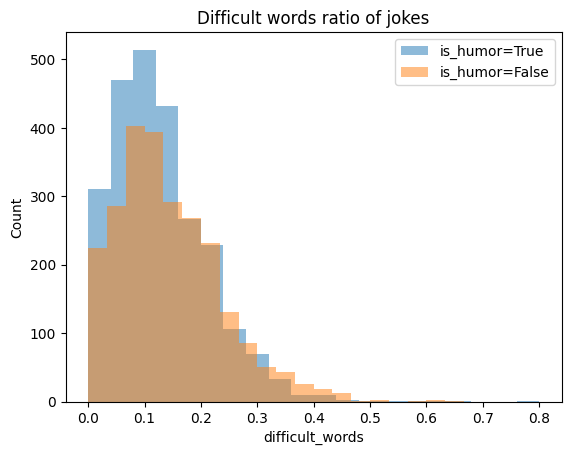

In [35]:
hist_compare(df, 'difficult_words', 'Difficult words ratio of jokes').show()

## Plots of Characteristics detailed

In [36]:
def scatter_plot(x_col, y_col , title, x_label, y_label):
    plt.figure(figsize=(6, 6))
    # scatterplot of text_length and word_count
    scatter = plt.scatter(df[x_col], df[y_col], c=df['is_humor'], alpha=0.5, cmap='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Create a custom legend
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.5)
    legend_labels = ['Not Humor', 'Humor']
    plt.legend(handles, legend_labels)
    return plt

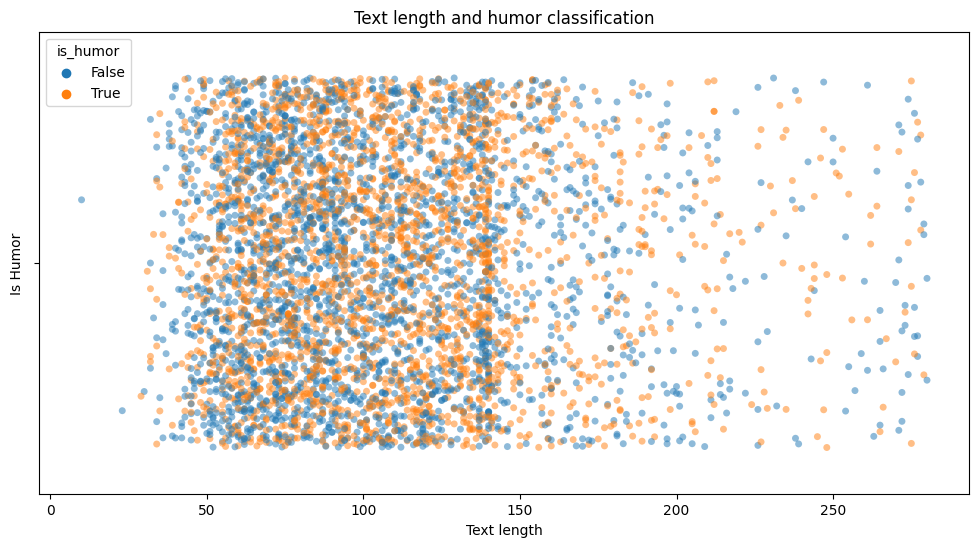

In [37]:
# Plot the stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(x='text_length', data=df, hue='is_humor', jitter=0.4, alpha=0.5)
plt.title('Text length and humor classification')
plt.xlabel('Text length')
plt.ylabel('Is Humor')
plt.show()

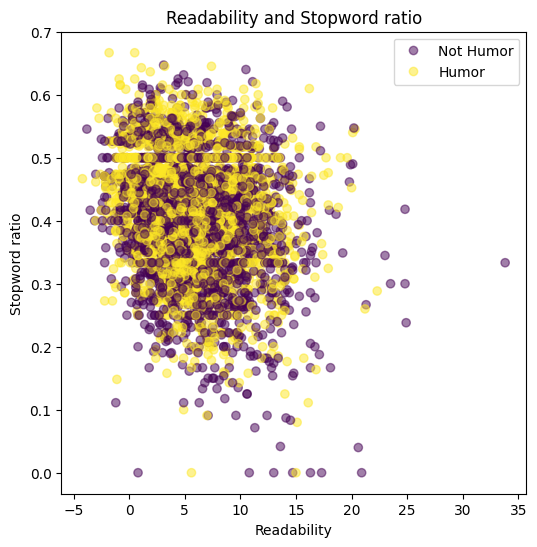

In [38]:
# readability, stopword_ratio, avg_word_length

scatter_plot('readability', 'stopword_ratio', 'Readability and Stopword ratio', 'Readability', 'Stopword ratio').show()

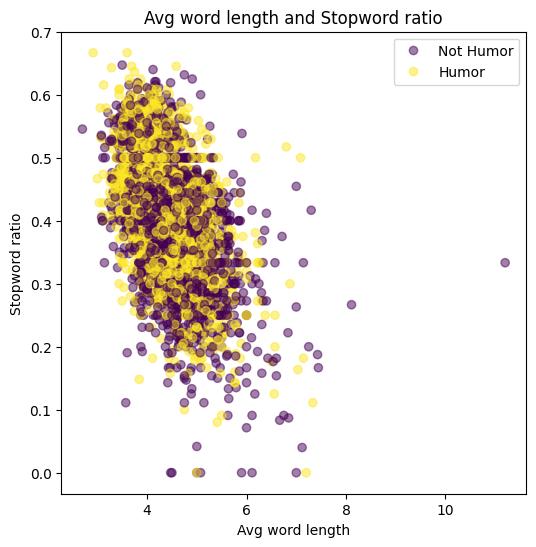

In [39]:
scatter_plot('avg_word_length', 'stopword_ratio', 'Avg word length and Stopword ratio', 'Avg word length', 'Stopword ratio').show()

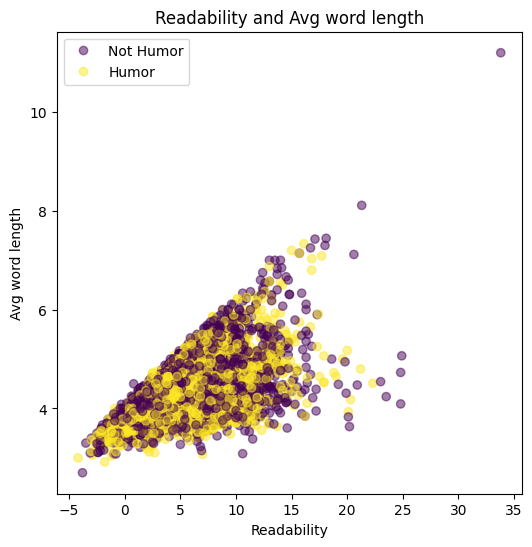

In [40]:
scatter_plot('readability', 'avg_word_length', 'Readability and Avg word length', 'Readability', 'Avg word length').show()

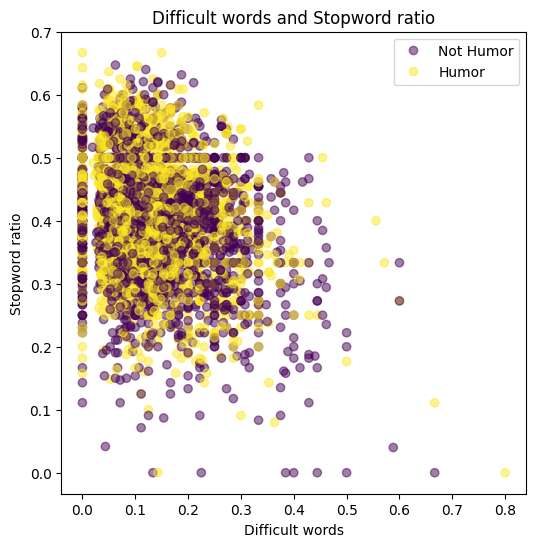

In [41]:
# difficut_words and stopword_ratio
scatter_plot('difficult_words', 'stopword_ratio', 'Difficult words and Stopword ratio', 'Difficult words', 'Stopword ratio').show()